In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [ ]:
# Sample documents in different categories
from datasets import load_dataset

dataset = load_dataset("okite97/news-data")

df = pd.DataFrame(dataset['train'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

# Convert category labels to one-hot encoding
encoder = OneHotEncoder()
category_encoded = encoder.fit_transform(df['Category'].values.reshape(-1, 1))

# print(category_encoded)
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_df=0.5,min_df=2,stop_words='english')

tfidf_matrix = vectorizer.fit_transform(df['Title'])

# Combine TF-IDF features with category information
combined_features = hstack((tfidf_matrix, category_encoded))

In [ ]:


# Clustering (K-means)
n_clusters = 6  # Number of categories
kmeans = KMeans(n_clusters=n_clusters, init=3 ,max_iter=200, n_init=10, random_state=42)
kmeans.fit(combined_features)

# clusters = kmeans.labels_.tolist()
# print(clusters)

In [ ]:
# Preprocess the documents
preprocessed_documents = [doc.lower().replace('.', '') for doc in documents.values()]

# Feature extraction (TF-IDF)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_documents)

# Clustering (K-means)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

def predict_new_document(new_document, vectorizer, kmeans_model):
    """
    Predicts the cluster for a new document.
    
    Args:
    - new_document (str): The new document text.
    - vectorizer (TfidfVectorizer): The TF-IDF vectorizer fitted on the training data.
    - kmeans_model (KMeans): The K-means model trained on the training data.
    
    Returns:
    - int: The predicted cluster for the new document.
    """
    # Preprocess the new document
    preprocessed_new_document = new_document.lower().replace('.', '')
    
    # Transform the new document into a numerical vector using the fitted TF-IDF vectorizer
    new_document_vector = vectorizer.transform([preprocessed_new_document])
    
    # Predict the cluster for the new document using the fitted K-means model
    predicted_cluster = kmeans_model.predict(new_document_vector)
    
    return predicted_cluster[0]

# Example usage:
new_document_text = "The latest research findings suggest that regular physical activity can improve mental health."
predicted_cluster = predict_new_document(new_document_text, vectorizer, kmeans)
print("Predicted Cluster:", predicted_cluster)

In [ ]:
print(df.head())

In [ ]:
df['Category'].value_counts()

In [ ]:
# Drop rows with missing values in 'Title' or 'Excerpt' columns
df = df.dropna(subset=['Title', 'Excerpt'])

# Sample text data
text_data = df['Title'] + ' ' + df['Excerpt']

# Define the number of clusters
n_clusters = 3


# Create a pipeline with TF-IDF Vectorizer, Normalizer, and KMeans
pipeline = make_pipeline(
    TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True),
    Normalizer(),
    KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1)
)

# Fit the pipeline to the text data
pipeline.fit(text_data)


# Assign clusters to the data
df.loc[:, 'Cluster'] = pipeline.predict(text_data)

# Display the clustered data
print(df[['Title', 'Excerpt', 'Category', 'Cluster']])

In [43]:
def count_cluster(df, vectorizer, kmeans_model):
    """
    Counts the number of documents in each cluster.
    
    Args:
    - df (DataFrame): The DataFrame containing the clustered data.
    - vectorizer (TfidfVectorizer): The TF-IDF vectorizer fitted on the training data.
    - kmeans_model (KMeans): The K-means model trained on the training data.
    """
    # Transform text data into TF-IDF vectors
    tfidf_matrix = vectorizer.transform(df['Title'])
    
    # Predict clusters for each document
    predicted_clusters = kmeans_model.predict(tfidf_matrix)
    
    # Add predicted clusters to DataFrame
    df['Cluster'] = predicted_clusters
    
    # Count the number of documents in each cluster
    cluster_counts = df['Cluster'].value_counts().sort_index()
    
    # Print the counts
    for cluster, count in cluster_counts.items():
        print(f"Cluster {cluster}: {count} documents")
    
# Example usage:
count_cluster(df, vectorizer, kmeans)


Cluster 0: 2409 documents
Cluster 1: 1862 documents
Cluster 2: 414 documents


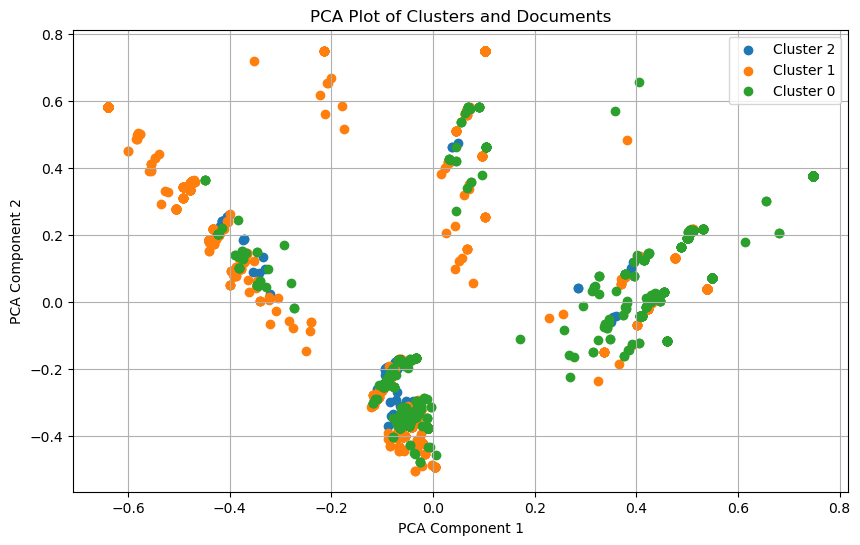

In [49]:
from sklearn.decomposition import PCA

def plot_cluster_documents(df, vectorizer, kmeans_model):
    """
    Plots a scatter plot showing the relationship between clusters and documents.
    
    Args:
    - df (DataFrame): The DataFrame containing the clustered data.
    - vectorizer (TfidfVectorizer): The TF-IDF vectorizer fitted on the training data.
    - kmeans_model (KMeans): The K-means model trained on the training data.
    """
    # Transform text data into TF-IDF vectors
    tfidf_matrix = vectorizer.transform(df['Title'])
    
    # Predict clusters for each document
    predicted_clusters = kmeans_model.predict(tfidf_matrix)
    
    # Add predicted clusters to DataFrame
    df['Cluster'] = predicted_clusters
    
    # Convert sparse matrix to dense matrix
    dense_matrix = tfidf_matrix.toarray()
    
    # Reduce dimensionality using PCA
    pca = PCA(n_components=2, random_state=42)
    pca_embedded = pca.fit_transform(dense_matrix)
    
    # Plot the clusters and documents
    plt.figure(figsize=(10, 6))
    for cluster in df['Cluster'].unique():
        plt.scatter(pca_embedded[df['Cluster'] == cluster, 0], 
                    pca_embedded[df['Cluster'] == cluster, 1], 
                    label=f'Cluster {cluster}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('PCA Plot of Clusters and Documents')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
plot_cluster_documents(df, vectorizer, kmeans)


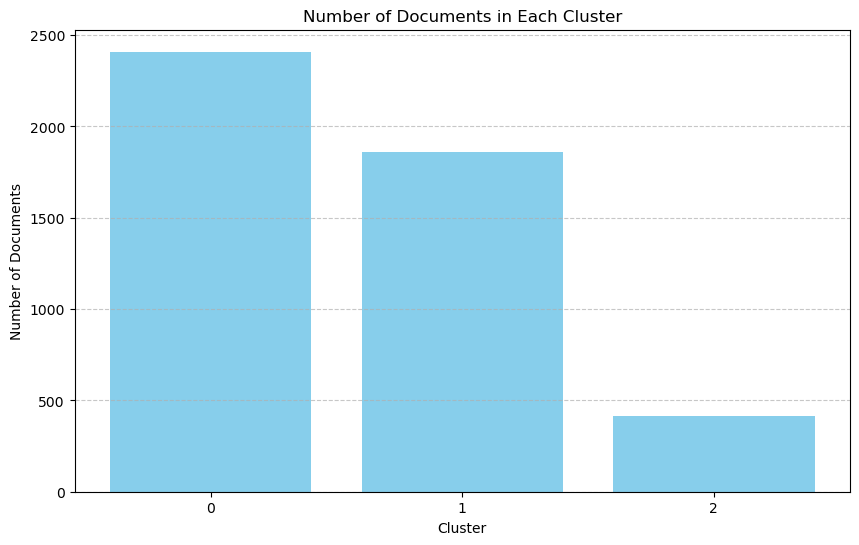

In [45]:
import matplotlib.pyplot as plt

def plot_cluster_counts(df, vectorizer, kmeans_model):
    """
    Plots a bar plot showing the number of documents in each cluster.
    
    Args:
    - df (DataFrame): The DataFrame containing the clustered data.
    - vectorizer (TfidfVectorizer): The TF-IDF vectorizer fitted on the training data.
    - kmeans_model (KMeans): The K-means model trained on the training data.
    """
    # Transform text data into TF-IDF vectors
    tfidf_matrix = vectorizer.transform(df['Title'])
    
    # Predict clusters for each document
    predicted_clusters = kmeans_model.predict(tfidf_matrix)
    
    # Add predicted clusters to DataFrame
    df['Cluster'] = predicted_clusters
    
    # Count the number of documents in each cluster
    cluster_counts = df['Cluster'].value_counts().sort_index()
    
    # Plot the counts
    plt.figure(figsize=(10, 6))
    plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Documents')
    plt.title('Number of Documents in Each Cluster')
    plt.xticks(cluster_counts.index)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Example usage:
plot_cluster_counts(df, vectorizer, kmeans)


In [52]:
def predict_new_document(new_document, pipeline):
    """
    Predicts the cluster for a new document.
    
    Args:
    - new_document (str): The new document text.
    - pipeline (Pipeline): The pipeline containing TF-IDF vectorizer and KMeans model.
    
    Returns:
    - int: The predicted cluster for the new document.
    """
    # Transform the new document into a numerical vector using the fitted TF-IDF vectorizer
    new_document_vector = pipeline.named_steps['tfidfvectorizer'].transform([new_document])
    
    # Predict the cluster for the new document using the fitted KMeans model
    predicted_cluster = pipeline.named_steps['kmeans'].predict(new_document_vector)
    
    return predicted_cluster[0]

# Example usage:
# new_document_text = "This is a new document about technology and artificial intelligence."
# predicted_cluster = predict_new_document(new_document_text, pipeline)
# print("Predicted Cluster:", predicted_cluster)

new_document_text = "This is a new document about sports"
predicted_cluster = predict_new_document(new_document_text, pipeline)
print("Predicted Cluster:", predicted_cluster)

Predicted Cluster: 2


# Prints a list of clusters along with the documents that belong to each cluster

In [78]:
def print_cluster_list(df):
    """
    Prints a list of clusters along with the documents that belong to each cluster.
    
    Args:
    - df (DataFrame): The DataFrame containing the clustered data.
    """
    # Group DataFrame by Cluster
    grouped = df.groupby('Cluster')
    
    # Print documents for each cluster
    for cluster, data in grouped:
        print(f"Cluster {cluster}:")
        for idx, row in data.iterrows():
            print(f"Title: {row['Title']} - Excerpt: {row['Excerpt']}")
        print("\n")

# Example usage:
# print_cluster_list(df)

# Prints documents belonging to each category

In [79]:
def map_cluster_to_category(cluster):
    """
    Maps clusters to categories.
    
    Args:
    - cluster (int): The cluster number.
    
    Returns:
    - str: The category corresponding to the cluster.
    """
    # Define the mapping of clusters to categories
    cluster_to_category = {
        0: 'sports',
        1: 'business',
        2: 'politics'
        # Add more mappings if needed
    }
    
    return cluster_to_category.get(cluster, 'unknown')

def print_category_documents(df):
    """
    Prints documents belonging to each category.
    
    Args:
    - df (DataFrame): The DataFrame containing the clustered data.
    """
    # Group DataFrame by Cluster
    grouped = df.groupby('Cluster')
    
    # Print documents for each category
    for cluster, data in grouped:
        category = map_cluster_to_category(cluster)
        print(f"Category: {category}:")
        for idx, row in data.iterrows():
            print(f"Title: {row['Title']} - Excerpt: {row['Excerpt']}")
        print("\n")

# Example usage:
# print_category_documents(df)


In [81]:
!pip3 install Queries

  Preparing metadata (setup.py) ... done
  Using cached psycopg2-2.9.9.tar.gz (384 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for Queries: filename=queries-2.1.1-py3-none-any.whl size=21721 sha256=833b6ff00be9e5d57a7c1ad2e503e6e483f3fb56a2f9b15b8e509b494628a036
  Stored in directory: /Users/sanjokdangol/Library/Caches/pip/wheels/a2/e5/c2/042b81acecb11359e8fded34ed5c5e2cdffa22c25251da3bbb
  Created wheel for psycopg2: filename=psycopg2-2.9.9-cp311-cp311-macosx_11_0_arm64.whl size=132036 sha256=2394bec57ad952e567c77fe9339aac4922f776a0ef20216bc0bc5fa9deb7fe50
  Stored in directory: /Users/sanjokdangol/Library/Caches/pip/wheels/ab/34/b9/78ebef1b3220b4840ee482461e738566c3c9165d2b5c914f51
Successfully built Queries psycopg2


In [1]:
from tkinter import *
from tkinter import messagebox

# Function to display search result message
def show_result_message():
    messagebox.showinfo('Search Result', 'Your search result is here')

# Function to process the query
def process_query():
    query = query_entry.get()
    if query:
        result = f"Query processed: {query}"
        result_label.config(text=result)
        # Display message when search button is clicked
        show_result_message()
    else:
        messagebox.showerror('Error', 'Please enter a query')

root = Tk()
root.geometry('400x200')
root.title('Simple Query Processor')
root.config(bg='white')

# Entry for user to input query
query_label = Label(root, text='Enter Query:', bg='white')
query_label.grid(row=0, column=0, padx=10, pady=10)
query_entry = Entry(root, width=30)
query_entry.grid(row=0, column=1, padx=10, pady=10)

# Button to trigger query processing
search_button = Button(root, text='Search', command=process_query)
search_button.grid(row=1, column=1, padx=10, pady=10)

# Label to display the result
result_label = Label(root, bg='white')
result_label.grid(row=2, column=0, columnspan=2, padx=10, pady=10)

root.mainloop()
